<a href="https://colab.research.google.com/github/champ-rtu/CE888/blob/main/Hate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
#Open train_text file 
x = []
with open('train_text.txt', 'r', encoding='utf-8') as f:
  data = f.readlines()
  
  for row in data:
    x.append(row)

In [4]:
#Open train_label file 
y = []
with open('train_labels.txt', 'r', encoding='utf-8') as f:
  data = f.read().split('\n')

  for row in data:
    y.append(row)

In [5]:
print(len(x))

9000


In [6]:
#combine both data to dataframe
data = pd.DataFrame(zip(x, y),  columns=['Comments', 'Labels'] )
data

,Comments,Labels
0,@user nice new signage. Are you not concerned ...,0
1,A woman who you fucked multiple times saying y...,1
2,@user @user real talk do you have eyes or were...,1
3,your girlfriend lookin at me like a groupie in...,1
4,Hysterical woman like @user \n,0
...,...,...
8995,Oooohhhh bitch didn't even listen to the dead ...,0
8996,@user Good Luck @user More Americans #WalkAway...,0
8997,Bitch you can't keep up so stop trying \n,1
8998,@user @user @user @user @user @user Japan is a...,0


Label describesion

0.   not-hate
1.   hate

In [7]:
#Check number of each label(Hate and non-hate)
data['Labels'].value_counts()

0    5217
1    3783
Name: Labels, dtype: int64

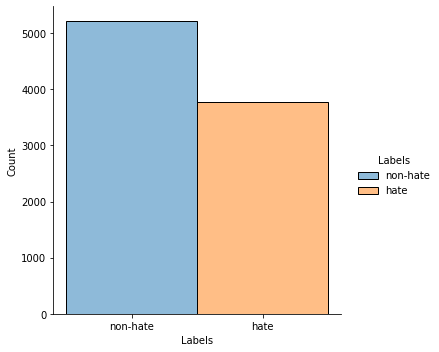

In [9]:
#Plot to identify number of Hate and non-hate 
data['Labels'].value_counts()
df = data.copy()
df['Labels'] = df['Labels'].map({'0':'non-hate', '1':'hate'})
sns_plot = sns.displot(x=df['Labels'], data=df, hue='Labels')

In [8]:
from textblob import TextBlob

In [9]:
#create new 2 columns which is len and word counts
data['length'] = data['Comments'].apply(lambda x: len(x))
data['word_count'] = data['Comments'].apply(lambda x: len(x.split()))

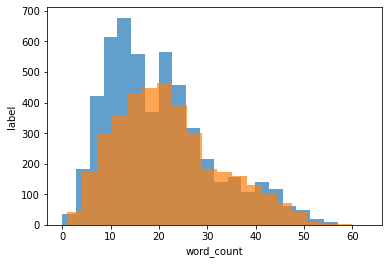

In [12]:
#Plot word counts with labels columns 
plt.hist(data[data['Labels'] == '0']['word_count'], bins = 20, alpha = 0.7)
plt.hist(data[data['Labels'] == '1']['word_count'], bins = 20, alpha = 0.7)
plt.xlabel('word_count')
plt.ylabel('label')
plt.show()

###Preprocessing text data
1. convert text to lowercase
2. remove number and punctuation
3. tokenization
4. remove stopword
5. stem

In [10]:
#import library for preprocessing step
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
#create punctuation, stopword and stem 
punct = string.punctuation
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')
ps = PorterStemmer()
STOP_WORDS.add('user')
nlp.vocab['user'].is_stop

True

In [17]:
#Create fucction for preprocessing step
#the first function is remove punctuation, covert text to lower case
def preprocessing_1(text):
  txt = re.sub(r'\d+','', text)
  txt = txt.translate(str.maketrans("","",punct))
  txt = txt.lower()
  txt = txt.strip()
  return txt

#For the second function; tokenization and remove stopwords
def preprocessing_2(text):
  txt = word_tokenize(text)
  txt = [i for i in txt if not i in stopwords]
  txt = txt = " ".join(txt)
  return txt

#The last function; stemming
def stem(text):
  txt = word_tokenize(text)
  txt = [ps.stem(i) for i in txt ]
  txt = txt = " ".join(txt)
  return txt


In [18]:
data['Comments'] = data['Comments'].apply(lambda x: preprocessing_1(x))
data['Comments'] = data['Comments'].apply(lambda x: preprocessing_2(x))
data.head()

,Comments,Labels,length,word_count
0,nice new signage concerned beatlemania style h...,0,109,16
1,woman fucked multiple times saying yo dick sma...,1,103,21
2,real talk eyes gouged rapefugee,1,80,16
3,girlfriend lookin like groupie bitch,1,60,11
4,hysterical woman like,0,29,4


In [19]:
#Create polarity column to check correlation between labels
data['polarity'] = data['Comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head()

,Comments,Labels,length,word_count,polarity
0,nice new signage concerned beatlemania style h...,0,109,16,-0.087879
1,woman fucked multiple times saying yo dick sma...,1,103,21,-0.283333
2,real talk eyes gouged rapefugee,1,80,16,0.200000
3,girlfriend lookin like groupie bitch,1,60,11,0.000000
4,hysterical woman like,0,29,4,-1.000000


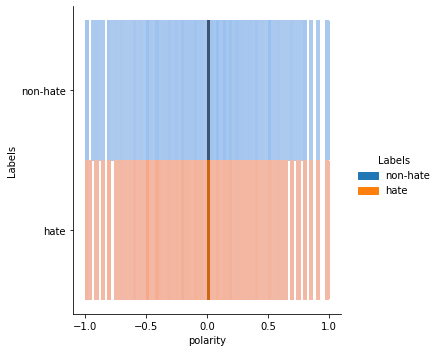

In [18]:
sns_plot = sns.displot(x=data['polarity'],y = df['Labels'], data=df, hue='Labels')

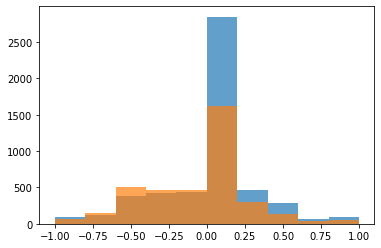

In [21]:
plt.hist(data[data['Labels'] == '0']['polarity'], bins =10, alpha = 0.7)
plt.hist(data[data['Labels'] == '1']['polarity'], bins = 10, alpha = 0.7)
plt.show()

In [22]:
from wordcloud import WordCloud

In [23]:
#seperate labels
df1 = data[data['Labels']=='0']
df2 = data[data['Labels']=='1']

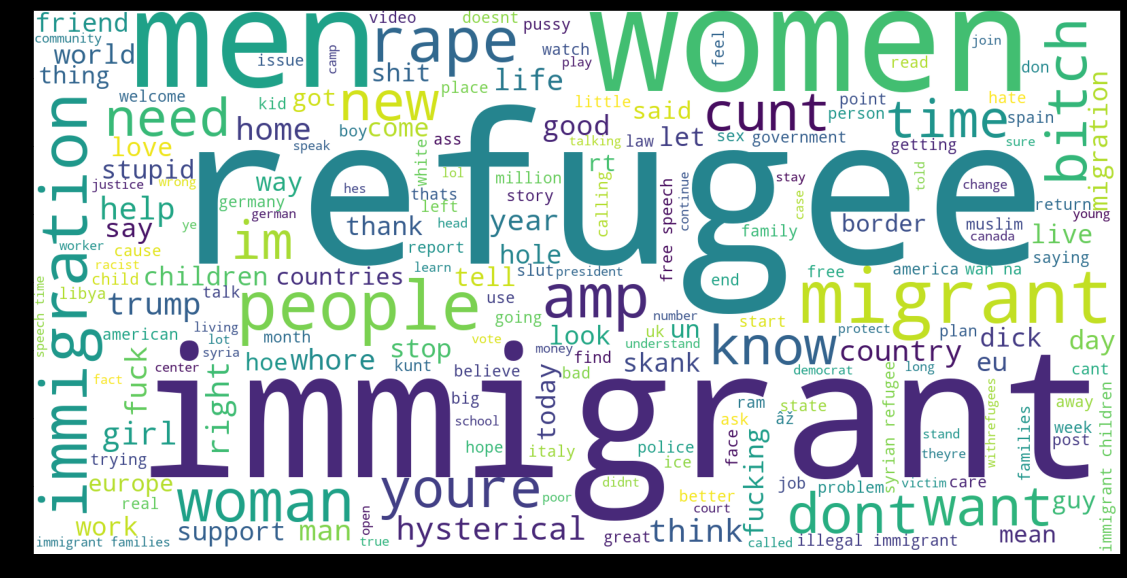

In [24]:
#Visualize the frequency words in non-hate comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df1['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

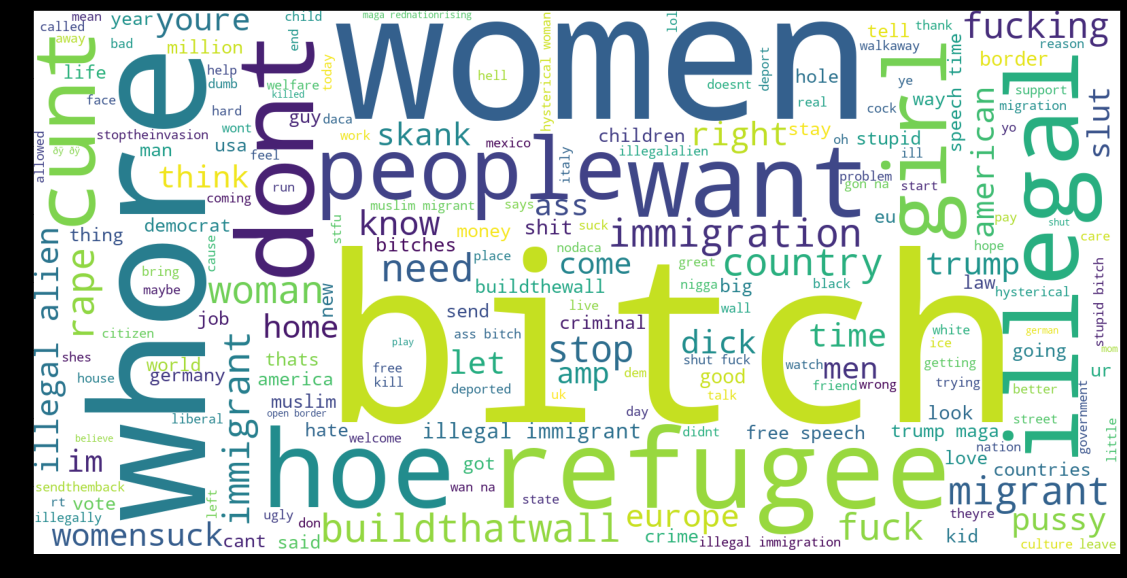

In [25]:
#Visualize the frequency words in hate comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df2['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [20]:
#apply stem function
data['Comments'] = data['Comments'].apply(lambda x: stem(x))
data.head()

,Comments,Labels,length,word_count,polarity
0,nice new signag concern beatlemania style hyst...,0,109,16,-0.087879
1,woman fuck multipl time say yo dick small comp...,1,103,21,-0.283333
2,real talk eye goug rapefuge,1,80,16,0.200000
3,girlfriend lookin like groupi bitch,1,60,11,0.000000
4,hyster woman like,0,29,4,-1.000000


###Modeling Section 

in this section 
we create pinline that includes TF-IDF and Random Forest classifier 


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [22]:

y = data['Labels']
x = data['Comments']

In [23]:
#Split train and test dataset
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.3, random_state =0, shuffle = True)

In [24]:
#Create pipline
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [25]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [26]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score

In [30]:
#Evaluation by F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1585
           1       0.77      0.65      0.70      1115

    accuracy                           0.78      2700
   macro avg       0.77      0.76      0.76      2700
weighted avg       0.78      0.78      0.77      2700



###Classify in test dataset

In [35]:
#Open test_text 
xt = []
with open('test_text.txt', 'r', encoding='utf-8') as f:
  data = f.readlines()
  
  for row in data:
    xt.append(row)

In [36]:
#Open test_label
yt = []
with open('test_labels.txt', 'r', encoding='utf-8') as f:
  data = f.read().split('\n')

  for row in data:
    yt.append(row)

In [37]:
data_t = pd.DataFrame(zip(xt, yt),  columns=['Comments', 'Labels'] )
data_t.head()

,Comments,Labels
0,"@user , you are correct that Reid certainly is...",0
1,Whoever just unfollowed me you a bitch \n,1
2,@user @user Those People Invaded Us!!! They DO...,1
3,"stop JUDGING bitches by there cover, jus cuz s...",1
4,how about i knock heads off and send them gift...,1


In [38]:
#Preprocessing in test file
data_t['Comments'] = data_t['Comments'].apply(lambda x: preprocessing_1(x))
data_t['Comments'] = data_t['Comments'].apply(lambda x: preprocessing_2(x))
data_t['Comments'] = data_t['Comments'].apply(lambda x: stem(x))

In [39]:
#Classified by Randomforest model
y_pred = classifier.predict(data_t['Comments'])

In [40]:
#Evaluation 
print(classification_report(data_t['Labels'], y_pred))

              precision    recall  f1-score   support

           0       0.69      0.14      0.23      1718
           1       0.44      0.91      0.59      1252

    accuracy                           0.47      2970
   macro avg       0.57      0.53      0.41      2970
weighted avg       0.59      0.47      0.38      2970

